Baisc


In [3]:
!pip install kaggle
!pip install -q kagglehub

In [3]:
import kagglehub
import os

# Download dataset
path = kagglehub.dataset_download("alessiocorrado99/animals10")

print("Path to dataset files:", path)

# List files in dataset directory
for root, dirs, files in os.walk(path):
    print(root)
    break

Using Colab cache for faster access to the 'animals10' dataset.
Path to dataset files: /kaggle/input/animals10
/kaggle/input/animals10


In [22]:
import os
os.makedirs('/content/SDG15_Biodiversity_Project/data', exist_ok=True)
os.listdir(path)


['translate.py', 'raw-img']

In [23]:
cp -r /kaggle/input/animals10/raw-img /content/SDG15_Biodiversity_Project/data/

In [24]:
DATASET_SOURCE = "/kaggle/input/animals10/raw-img"
PROJECT_ROOT = "/content/SDG15_Biodiversity_Project"
DATASET_TARGET = f"{PROJECT_ROOT}/data/raw-img"


In [25]:
import os
os.makedirs(DATASET_TARGET, exist_ok=True)


In [26]:
!cp -r /kaggle/input/animals10/raw-img/* /content/SDG15_Biodiversity_Project/data/raw-img/


In [27]:
import os
os.listdir("/content/SDG15_Biodiversity_Project/data/raw-img")


['cane',
 'gallina',
 'pecora',
 'ragno',
 'scoiattolo',
 'cavallo',
 'gatto',
 'mucca',
 'elefante',
 'farfalla']

In [28]:
DATA_DIR = "/content/SDG15_Biodiversity_Project/data/raw-img"


In [29]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
import numpy as np
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_data = datagen.flow_from_directory(
    DATA_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_data = datagen.flow_from_directory(
    DATA_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation',
    shuffle=True
)



Found 20947 images belonging to 10 classes.
Found 5232 images belonging to 10 classes.


In [30]:
base_model = MobileNetV2(
    input_shape=(224,224,3),
    include_top=False,
    weights='imagenet'
)

base_model.trainable = False


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [31]:
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
output = Dense(train_data.num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)


In [33]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=10
)


Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


655/655 ━━━━━━━━━━━━━━━━━━━━ 95s 117ms/step - accuracy: 0.8884 - loss: 0.3856 - val_accuracy: 0.9503 - val_loss: 0.1666
Epoch 2/10
655/655 ━━━━━━━━━━━━━━━━━━━━ 50s 76ms/step - accuracy: 0.9591 - loss: 0.1312 - val_accuracy: 0.9469 - val_loss: 0.1712
Epoch 3/10
655/655 ━━━━━━━━━━━━━━━━━━━━ 48s 73ms/step - accuracy: 0.9711 - loss: 0.0916 - val_accuracy: 0.9536 - val_loss: 0.1604
Epoch 4/10
655/655 ━━━━━━━━━━━━━━━━━━━━ 47s 71ms/step - accuracy: 0.9811 - loss: 0.0618 - val_accuracy: 0.9516 - val_loss: 0.1708
Epoch 5/10
655/655 ━━━━━━━━━━━━━━━━━━━━ 48s 73ms/step - accuracy: 0.9845 - loss: 0.0497 - val_accuracy: 0.9526 - val_loss: 0.1826
Epoch 6/10
655/655 ━━━━━━━━━━━━━━━━━━━━ 47s 72ms/step - accuracy: 0.9903 - loss: 0.0316 - val_accuracy: 0.9442 - val_loss: 0.2056
Epoch 7/10
655/655 ━━━━━━━━━━━━━━━━━━━━ 47s 71ms/step - accuracy: 0.9913 - loss: 0.0279 - val_accuracy: 0.9513 - val_loss: 0.1934
Epoch 8/10
655/655 ━━━━━━━━━━━━━━━━━━━━ 48s 73ms/step - accuracy: 0.9935 - loss: 0.0200 - val_accura

In [ ]:
MODEL_PATH = "model/biodiversity_model.h5"

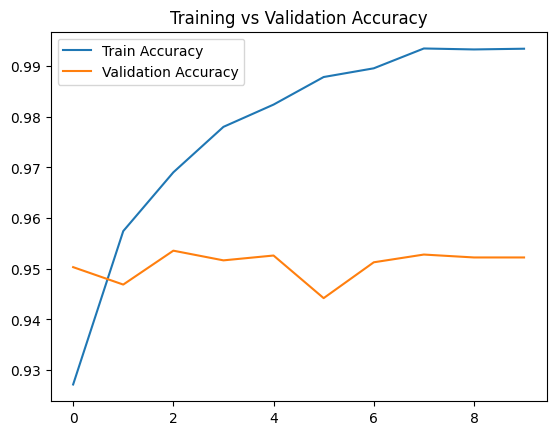

In [35]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title("Training vs Validation Accuracy")
plt.show()


In [37]:
!pip install streamlit pyngrok

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 100.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 149.8 MB/s eta 0:00:00


In [39]:
import streamlit as st
import tensorflow as tf
import numpy as np
from PIL import Image
import os

st.set_page_config(
    page_title="AI-Driven Biodiversity Monitoring",
    layout="centered"
)

st.title("🌿 AI-Driven Biodiversity Monitoring and Species Classification System")
st.write(
    """
    This web application uses **Deep Learning** to identify animal species from images.
    It supports **SDG 15 – Life on Land** by enabling automated biodiversity monitoring.
    """
)


MODEL_PATH = "/content/SDG15_Biodiversity_Project/model/biodiversity_model.h5"

@st.cache_resource
def load_model():
    if not os.path.exists(MODEL_PATH):
        st.error("❌ Model file not found. Please check the model path.")
        st.stop()
    model = tf.keras.models.load_model(MODEL_PATH)
    return model

model = load_model()

CLASS_NAMES = [
    "Dog (Cane)",
    "Chicken (Gallina)",
    "Sheep (Pecora)",
    "Spider (Ragno)",
    "Squirrel (Scoiattolo)",
    "Horse (Cavallo)",
    "Cat (Gatto)",
    "Cow (Mucca)",
    "Elephant (Elefante)",
    "Butterfly (Farfalla)"
]


uploaded_file = st.file_uploader(
    "📤 Upload an animal image (JPG / PNG)",
    type=["jpg", "jpeg", "png"]
)

if uploaded_file is not None:
    image = Image.open(uploaded_file).convert("RGB")
    st.image(image, caption="Uploaded Image", use_column_width=True)


    img = image.resize((224, 224))
    img_array = np.array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    prediction = model.predict(img_array)
    confidence = np.max(prediction)
    predicted_class = CLASS_NAMES[np.argmax(prediction)]
    st.markdown("### 🧠 Prediction Result")
    st.success(f"**Predicted Species:** {predicted_class}")
    st.info(f"**Confidence Score:** {confidence * 100:.2f}%")

st.markdown("---")
st.caption(
    "🔬 This project demonstrates the responsible use of AI for biodiversity conservation, "
    "aligned with **UN SDG 15 – Life on Land**."
)


2026-01-15 19:16:03.679 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-15 19:16:03.680 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-15 19:16:03.681 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-15 19:16:03.682 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-15 19:16:03.683 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-15 19:16:03.684 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-15 19:16:03.685 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-15 19:16:03.688 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

DeltaGenerator()

In [42]:
!streamlit run app.py &>/content/logs.txt &


In [47]:
from pyngrok import ngrok

ngrok.set_auth_token("38J5KP1BBy7w5fbTN08CWLjqBbj_5UvnaAayUmme8FbpMeNpe")


In [48]:
from pyngrok import ngrok
ngrok.connect(8501)


<NgrokTunnel: "https://bernetta-nongratifying-scrumptiously.ngrok-free.dev" -> "http://localhost:8501">